In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
uploaded = files.upload()
credit_data = pd.read_csv('revenue_target.csv')

Saving revenue_target.csv to revenue_target (1).csv


In [5]:
print(credit_data)

        CLIENTNUM quarter  Year     Date  Type Card_Category  Target Revenue
0       708082083      Q1  2018  Q1,2018  Shop          Blue        4.204200
1       708083283      Q1  2018  Q1,2018  Shop          Blue        4.744425
2       708084558      Q1  2018  Q1,2018  Shop          Blue       13.869450
3       708085458      Q1  2018  Q1,2018  Shop          Blue        4.303425
4       708086958      Q1  2018  Q1,2018  Shop          Blue        4.712400
...           ...     ...   ...      ...   ...           ...             ...
306871  721164483      Q4  2019  Q4,2019  Cash          Blue        3.844992
306872  708095133      Q4  2019  Q4,2019  Cash          Blue       16.249226
306873  900202780      Q4  2019  Q4,2019  Cash          Blue        0.928173
306874  779770683      Q4  2019  Q4,2019  Cash          Blue        4.086854
306875  709632483      Q4  2019  Q4,2019  Cash          Blue        0.140570

[306876 rows x 7 columns]


In [6]:
credit_data.describe()

,CLIENTNUM,Year,Target Revenue
count,3.068760e+05,306876.000000,306876.000000
mean,7.516599e+08,2018.499381,12.323399
std,5.533922e+07,0.500000,16.561188
min,7.080821e+08,2018.000000,0.000000
25%,7.135329e+08,2018.000000,2.918322
50%,7.189092e+08,2018.000000,6.664788
75%,7.833819e+08,2019.000000,14.789431
max,9.002031e+08,2019.000000,300.405000


In [7]:
credit_data.tail()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
306871,721164483,Q4,2019,"Q4,2019",Cash,Blue,3.844992
306872,708095133,Q4,2019,"Q4,2019",Cash,Blue,16.249226
306873,900202780,Q4,2019,"Q4,2019",Cash,Blue,0.928173
306874,779770683,Q4,2019,"Q4,2019",Cash,Blue,4.086854
306875,709632483,Q4,2019,"Q4,2019",Cash,Blue,0.140570


In [8]:
# checking missing values in dataset
missing_data = credit_data.columns[credit_data.isna().any()].tolist()
credit_data.drop(columns=missing_data,inplace=True)

In [9]:
credit_data.head()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
0,708082083,Q1,2018,"Q1,2018",Shop,Blue,4.204200
1,708083283,Q1,2018,"Q1,2018",Shop,Blue,4.744425
2,708084558,Q1,2018,"Q1,2018",Shop,Blue,13.869450
3,708085458,Q1,2018,"Q1,2018",Shop,Blue,4.303425
4,708086958,Q1,2018,"Q1,2018",Shop,Blue,4.712400


In [10]:
# implementing label encoding for the dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
credit_data['quarter'] = le.fit_transform(credit_data['quarter'])
credit_data['Year'] = le.fit_transform(credit_data['Year'])
credit_data['Type'] = le.fit_transform(credit_data['Type'])
credit_data['Card_Category'] = le.fit_transform(credit_data['Card_Category'])
credit_data['Date'] = le.fit_transform(credit_data['Date'])

In [11]:
credit_data.head()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
0,708082083,0,0,0,3,0,4.204200
1,708083283,0,0,0,3,0,4.744425
2,708084558,0,0,0,3,0,13.869450
3,708085458,0,0,0,3,0,4.303425
4,708086958,0,0,0,3,0,4.712400


In [12]:
# scaling the data for better optimisation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(credit_data)
# converting scaled data back to a dataframe
scaled_data_df = pd.DataFrame(scaled_data,columns=credit_data.columns)
print(scaled_data)

[[-0.78746849 -1.30506153 -0.99876248 ...  1.34164079 -0.25949251
  -0.49025545]
 [-0.78744681 -1.30506153 -0.99876248 ...  1.34164079 -0.25949251
  -0.45763546]
 [-0.78742377 -1.30506153 -0.99876248 ...  1.34164079 -0.25949251
   0.093354  ]
 ...
 [ 2.68422848  1.38569406  1.00123905 ... -1.34164079 -0.25949251
  -0.68806932]
 [ 0.50797286  1.38569406  1.00123905 ... -1.34164079 -0.25949251
  -0.49734104]
 [-0.75945215  1.38569406  1.00123905 ... -1.34164079 -0.25949251
  -0.73562656]]


In [13]:
print(scaled_data_df)

        CLIENTNUM   quarter      Year      Date      Type  Card_Category  \
0       -0.787468 -1.305062 -0.998762 -1.489870  1.341641      -0.259493   
1       -0.787447 -1.305062 -0.998762 -1.489870  1.341641      -0.259493   
2       -0.787424 -1.305062 -0.998762 -1.489870  1.341641      -0.259493   
3       -0.787408 -1.305062 -0.998762 -1.489870  1.341641      -0.259493   
4       -0.787380 -1.305062 -0.998762 -1.489870  1.341641      -0.259493   
...           ...       ...       ...       ...       ...            ...   
306871  -0.551064  1.385694  1.001239  1.568979 -1.341641      -0.259493   
306872  -0.787233  1.385694  1.001239  1.568979 -1.341641      -0.259493   
306873   2.684228  1.385694  1.001239  1.568979 -1.341641      -0.259493   
306874   0.507973  1.385694  1.001239  1.568979 -1.341641      -0.259493   
306875  -0.759452  1.385694  1.001239  1.568979 -1.341641      -0.259493   

        Target Revenue  
0            -0.490255  
1            -0.457635  
2           

In [14]:
scaled_data_df.head()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
0,-0.787468,-1.305062,-0.998762,-1.48987,1.341641,-0.259493,-0.490255
1,-0.787447,-1.305062,-0.998762,-1.48987,1.341641,-0.259493,-0.457635
2,-0.787424,-1.305062,-0.998762,-1.48987,1.341641,-0.259493,0.093354
3,-0.787408,-1.305062,-0.998762,-1.48987,1.341641,-0.259493,-0.484264
4,-0.787380,-1.305062,-0.998762,-1.48987,1.341641,-0.259493,-0.459569


In [15]:
scaled_data_df.tail()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
306871,-0.551064,1.385694,1.001239,1.568979,-1.341641,-0.259493,-0.511945
306872,-0.787233,1.385694,1.001239,1.568979,-1.341641,-0.259493,0.237050
306873,2.684228,1.385694,1.001239,1.568979,-1.341641,-0.259493,-0.688069
306874,0.507973,1.385694,1.001239,1.568979,-1.341641,-0.259493,-0.497341
306875,-0.759452,1.385694,1.001239,1.568979,-1.341641,-0.259493,-0.735627


In [16]:
scaled_data_df.describe()

,CLIENTNUM,quarter,Year,Date,Type,Card_Category,Target Revenue
count,3.068760e+05,3.068760e+05,3.068760e+05,3.068760e+05,3.068760e+05,3.068760e+05,3.068760e+05
mean,-1.941237e-16,5.927441e-18,2.845172e-16,1.066939e-16,1.778232e-17,3.186000e-17,9.039348e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-7.874685e-01,-1.305062e+00,-9.987625e-01,-1.489870e+00,-1.341641e+00,-2.594925e-01,-7.441145e-01
25%,-6.889708e-01,-1.305062e+00,-9.987625e-01,-1.052891e+00,-6.708204e-01,-2.594925e-01,-5.678996e-01
50%,-5.918190e-01,-4.081430e-01,-9.987625e-01,-1.789345e-01,0.000000e+00,-2.594925e-01,-3.416796e-01
75%,5.732296e-01,4.887755e-01,1.001239e+00,6.950222e-01,6.708204e-01,-2.594925e-01,1.489045e-01
max,2.684235e+00,1.385694e+00,1.001239e+00,1.568979e+00,1.341641e+00,4.107894e+00,1.739501e+01


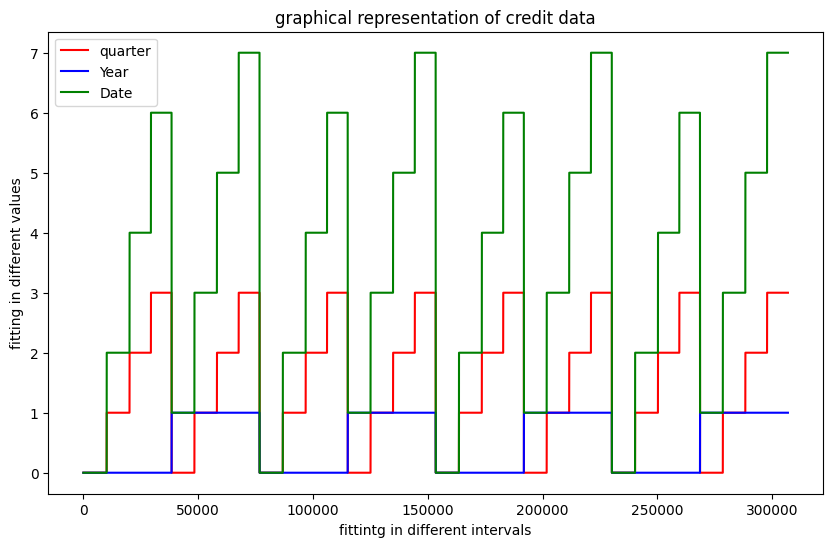

In [17]:
# plotting the credit data
plt.figure(figsize=(10,6))
plt.plot(credit_data['quarter'],label='quarter',color='red')
plt.plot(credit_data['Year'],label='Year',color='blue')
plt.plot(credit_data['Date'],label='Date',color='green')
plt.xlabel('fittintg in different intervals')
plt.ylabel('fitting in different values')
plt.title('graphical representation of credit data')
plt.legend()
plt.show()

(array([40508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 79632.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 76448.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 73912.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36376.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  ]),
 <BarContainer object of 50 artists>)

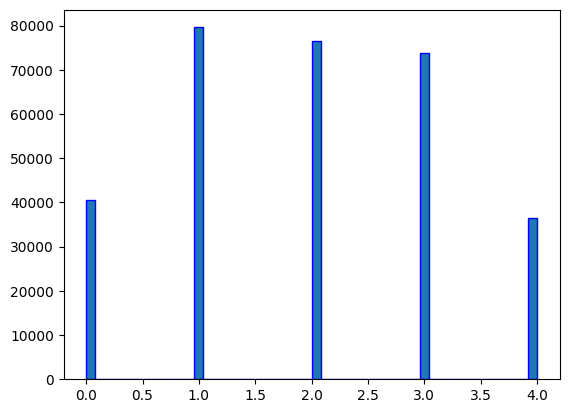

In [18]:
# plotting in hist plot
plt.hist(credit_data['quarter'] + credit_data['Year'],bins=50,edgecolor='blue')

In [19]:
# training the model
from sklearn.model_selection import train_test_split
x = scaled_data_df.iloc[:,:-1].values
y = scaled_data_df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[ 1.33889617 -0.408143   -0.99876248 -0.61591286  1.34164079 -0.25949251]
 [-0.5945363  -1.30506153 -0.99876248 -1.48986958  1.34164079  4.10789447]
 [ 0.68252204 -0.408143    1.00123905 -0.17893449 -0.4472136  -0.25949251]
 ...
 [-0.77707892 -0.408143    1.00123905 -0.17893449 -0.4472136  -0.25949251]
 [-0.56166128  1.38569406  1.00123905  1.56897896 -0.4472136  -0.25949251]
 [-0.65553608 -1.30506153  1.00123905 -1.05289122 -0.4472136  -0.25949251]]
[ 0.66299824  0.18588827  0.23511544 ... -0.45544884 -0.1989353
  2.40836019]
[[-0.56628821 -1.30506153 -0.99876248 -1.48986958 -0.4472136  -0.25949251]
 [ 0.48310212 -0.408143    1.00123905 -0.17893449  1.34164079 -0.25949251]
 [-0.55911607  1.38569406  1.00123905  1.56897896  0.4472136  -0.25949251]
 ...
 [-0.77151956  0.48877553  1.00123905  0.69502224 -0.4472136  -0.25949251]
 [-0.61367963  0.48877553  1.00123905  0.69502224 -0.4472136  -0.25949251]
 [-0.57316354 -1.30506153  1.00123905 -1.05289122 -0.4472136  -0.25949251]]
[-0.169426

In [20]:
x_train.shape

(245500, 6)

In [21]:
y_train.shape

(245500,)

In [22]:
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
print(x_train_df)
print(y_train_df)

               0         1         2         3         4         5
0       1.338896 -0.408143 -0.998762 -0.615913  1.341641 -0.259493
1      -0.594536 -1.305062 -0.998762 -1.489870  1.341641  4.107894
2       0.682522 -0.408143  1.001239 -0.178934 -0.447214 -0.259493
3       0.611283  1.385694 -0.998762  1.132001  1.341641 -0.259493
4      -0.762762  0.488776 -0.998762  0.258044 -1.341641 -0.259493
...          ...       ...       ...       ...       ...       ...
245495 -0.639144 -1.305062  1.001239 -1.052891 -0.447214 -0.259493
245496  1.168256  0.488776 -0.998762  0.258044 -1.341641 -0.259493
245497 -0.777079 -0.408143  1.001239 -0.178934 -0.447214 -0.259493
245498 -0.561661  1.385694  1.001239  1.568979 -0.447214 -0.259493
245499 -0.655536 -1.305062  1.001239 -1.052891 -0.447214 -0.259493

[245500 rows x 6 columns]
               0
0       0.662998
1       0.185888
2       0.235115
3       0.745469
4      -0.659347
...          ...
245495 -0.744114
245496  0.294209
245497 -0.455449

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train_df,y_train_df)
y_pred = LR.predict(x_train_df)
print(y_pred)
y_pred_df = pd.DataFrame(y_pred)

[[ 0.55410076]
 [ 0.79583595]
 [-0.19505292]
 ...
 [-0.43870526]
 [-0.21702557]
 [-0.51390057]]


In [24]:
print(y_pred_df)

               0
0       0.554101
1       0.795836
2      -0.195053
3       0.616112
4      -0.161427
...          ...
245495 -0.510971
245496  0.160839
245497 -0.438705
245498 -0.217026
245499 -0.513901

[245500 rows x 1 columns]


In [25]:
# calculating evaluation metrics for dataset
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_train_df,y_pred_df)
mse = mean_squared_error(y_train_df,y_pred_df)
r2score = r2_score(y_train_df,y_pred_df)
rmse = mean_squared_error(y_train_df,y_pred_df,squared=False)
print(mae)
print(mse)
print(r2score)
print(rmse)

0.5933864383052668
0.8915282213471405
0.10526363892833257
0.9442077215036638


In [26]:
print(x_train_df)
print(y_train_df)

               0         1         2         3         4         5
0       1.338896 -0.408143 -0.998762 -0.615913  1.341641 -0.259493
1      -0.594536 -1.305062 -0.998762 -1.489870  1.341641  4.107894
2       0.682522 -0.408143  1.001239 -0.178934 -0.447214 -0.259493
3       0.611283  1.385694 -0.998762  1.132001  1.341641 -0.259493
4      -0.762762  0.488776 -0.998762  0.258044 -1.341641 -0.259493
...          ...       ...       ...       ...       ...       ...
245495 -0.639144 -1.305062  1.001239 -1.052891 -0.447214 -0.259493
245496  1.168256  0.488776 -0.998762  0.258044 -1.341641 -0.259493
245497 -0.777079 -0.408143  1.001239 -0.178934 -0.447214 -0.259493
245498 -0.561661  1.385694  1.001239  1.568979 -0.447214 -0.259493
245499 -0.655536 -1.305062  1.001239 -1.052891 -0.447214 -0.259493

[245500 rows x 6 columns]
               0
0       0.662998
1       0.185888
2       0.235115
3       0.745469
4      -0.659347
...          ...
245495 -0.744114
245496  0.294209
245497 -0.455449

In [40]:
# implementing random forest regressor for the dataset
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=42)
RFR.fit(x_train,y_train)
y_pred_RFR = RFR.predict(x_test)
print(y_pred_RFR)
y_pred_RFR_df = pd.DataFrame(y_pred_RFR)

[ 0.20257641 -0.35917912 -0.13406815 ... -0.05566541 -0.20741559
 -0.46554892]


In [51]:
print(y_pred_RFR_df)

              0
0      0.202576
1     -0.359179
2     -0.134068
3     -0.026052
4      0.121564
...         ...
61371 -0.556877
61372 -0.408859
61373 -0.055665
61374 -0.207416
61375 -0.465549

[61376 rows x 1 columns]


In [59]:
y_test_df = pd.DataFrame(y_test)

In [63]:
# performing evaluation metrics on the testing samples
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test_df,y_pred_RFR_df)
mse = mean_squared_error(y_test_df,y_pred_RFR_df)
r2score = r2_score(y_test_df,y_pred_RFR_df)
print(mae)
print(mse)
print(r2score)

0.4192911723317108
0.6181062565978592
0.3906212056948659


In [64]:
# implementing decision tree on the dataset
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
DTR_predict = DTR.predict(x_test)
print(DTR_predict)

[ 0.19082905 -0.68892993 -0.39600747 ... -0.6946049  -0.66627065
 -0.46824492]


In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,median_absolute_error,max_error,explained_variance_score
mae = mean_absolute_error(y_test_df,DTR_predict)
mse = mean_squared_error(y_test_df,DTR_predict)
r2score = r2_score(y_test_df,DTR_predict)
rmse = mean_squared_error(y_test_df,DTR_predict,squared=False)
mape = mean_absolute_percentage_error(y_test_df,DTR_predict)*100
mese = median_absolute_error(y_test_df,DTR_predict)
me = max_error(y_test_df,DTR_predict)
evs = explained_variance_score(y_test_df,DTR_predict)
print(mae)
print(mse)
print(r2score)
print(rmse)
print(mape)
print(mese)
print(me)
print(evs)

0.4650569093391881
0.8468715110660461
0.16508604331998045
0.9202562203354271
368.1537007248652
0.1756147421139943
12.615550401443324
0.16516231552847416
